<a href="https://colab.research.google.com/github/Armin-Abdollahi/Signal-Processing/blob/main/Convert_signal_to_spectrogram_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convert signal to spectrogram image

In [1]:
from google.colab import drive
drive.mount('../content/drive')

Mounted at ../content/drive


In [3]:
!pip install --upgrade mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 48.5 MB/s eta 0:00:00


In [4]:
import mne
print("MNE version:", mne.__version__)

MNE version: 1.8.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [6]:
raw = mne.io.read_raw_gdf('/content/drive/MyDrive/BCI_Database/A1_CE_baseline.gdf', preload=True)

Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/A1_CE_baseline.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 95775  =      0.000 ...   187.061 secs...


In [7]:
raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<RawGDF | A1_CE_baseline.gdf, 32 x 95776 (187.1 s), ~23.4 MB, data loaded>

In [8]:
data, times = raw[:]

# Select the data for a single channel, e.g., the first EEG channel
channel_data = data[0]

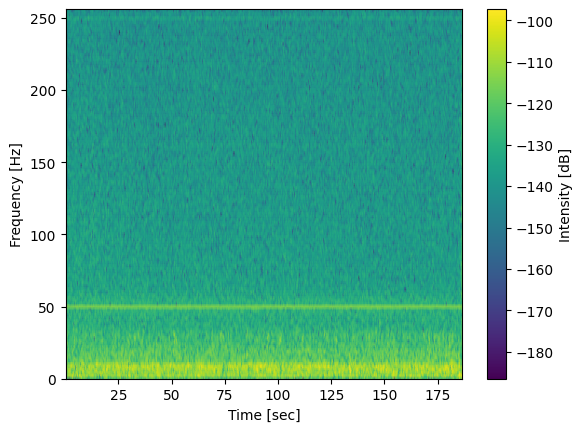

In [9]:
# Define the sampling frequency
fs = raw.info['sfreq']

# Generate the spectrogram
frequencies, times, Sxx = spectrogram(channel_data, fs)

# Plot the spectrogram
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.show()

## Convert signals to spectrogram images for all .gdf files in a specific folder and save the images in another folder

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!pip install --upgrade mne

In [12]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import os

In [13]:
# Define the input and output directories
input_dir = '/content/drive/MyDrive/BCI_Database/gdf'
output_dir = '/content/drive/MyDrive/BCI_Database/Spectrogram_Images/'

In [14]:
# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

In [15]:
# Loop through all .gdf files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.gdf'):
        # Read the raw data
        raw = mne.io.read_raw_gdf(os.path.join(input_dir, filename), preload=True)

        # Pick EEG channels
        raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')

        # Get the data and sampling frequency
        data, times = raw[:]
        fs = raw.info['sfreq']

        # Loop through each channel
        for i, channel_data in enumerate(data):
            # Generate the spectrogram
            frequencies, times, Sxx = spectrogram(channel_data, fs)

            # Plot the spectrogram
            plt.figure()
            plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
            plt.ylabel('Frequency [Hz]')
            plt.xlabel('Time [sec]')
            plt.colorbar(label='Intensity [dB]')
            plt.title(f'Channel {i+1}')

            # Save the figure
            output_filename = f'{os.path.splitext(filename)[0]}_channel_{i+1}.png'
            plt.savefig(os.path.join(output_dir, output_filename))
            plt.close()

Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/gdf/A1_CE_baseline.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 95775  =      0.000 ...   187.061 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/gdf/C85_R2_acquisition.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 230431  =      0.000 ... 